In [207]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set_theme(style ="darkgrid")
import numpy as np
import warnings
from IPython.display import SVG
import graphviz 
from graphviz import Source
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [95]:
dataset = pd.read_csv("FIFA22_data.csv")

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [97]:
dataset.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
5,212622,J. Kimmich,26,https://cdn.sofifa.com/players/212/622/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,89,90,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,79.0,8.0,15.0,7.0,15.0,15.0,CDM,89.0,€186.3M,85.0
6,187961,Paulinho,32,https://cdn.sofifa.com/players/187/961/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,83,83,Al Ahli,https://cdn.sofifa.com/teams/112387/30.png,...,75.0,16.0,16.0,11.0,6.0,8.0,CM,83.0,€48.5M,80.0
7,181291,G. Wijnaldum,30,https://cdn.sofifa.com/players/181/291/22_60.png,Netherlands,https://cdn.sofifa.com/flags/nl.png,84,84,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,70.0,16.0,6.0,14.0,12.0,6.0,CM,84.0,€74.9M,79.0
8,208333,E. Can,27,https://cdn.sofifa.com/players/208/333/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,82,83,Borussia Dortmund,https://cdn.sofifa.com/teams/22/30.png,...,86.0,14.0,8.0,8.0,13.0,11.0,CDM,85.0,€62.1M,81.0
9,194765,A. Griezmann,30,https://cdn.sofifa.com/players/194/765/22_60.png,France,https://cdn.sofifa.com/flags/fr.png,85,85,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,CAM,86.0,NaN,43.0


In [98]:
dataset.shape

(16710, 65)

In [99]:
dataset.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [100]:
dataset.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,...,892.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,220560.467923,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,...,48.021300,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,38496.607959,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,...,21.904204,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,27.000000,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,4.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,203891.250000,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,...,27.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,229253.000000,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,...,53.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,245368.750000,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,...,67.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,93.000000,90.000000,93.000000,93.000000


In [101]:
dataset_c = dataset.copy()

In [102]:
dataset.drop(['ID','Club Logo','Flag','Photo','Real Face'], axis=1, inplace=True)

In [103]:
#dataset.drop(['Real Face'],axis=1,inplace=True)


In [104]:
dataset.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,€107.5M,€250K,2341,Right,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,L. Goretzka,26,Germany,87,88,FC Bayern München,€93M,€140K,2314,Right,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,€44.5M,€135K,2307,Right,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,2304,Right,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,M. Acuña,29,Argentina,84,84,Sevilla FC,€37M,€45K,2292,Left,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [105]:
dataset.loc[~dataset['Loaned From'].isnull()][:5]


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
9,A. Griezmann,30,France,85,85,Atlético de Madrid,€53M,€220K,2259,Left,...,49.0,14.0,8.0,14.0,13.0,14.0,CAM,86.0,NaN,43.0
43,Saúl,26,Spain,82,85,Chelsea,€39.5M,€68K,2199,Left,...,77.0,7.0,13.0,12.0,10.0,9.0,CM,84.0,NaN,77.0
72,A. Florenzi,30,Italy,81,81,AC Milan,€22M,€58K,2178,Right,...,75.0,9.0,8.0,10.0,11.0,10.0,RB,81.0,NaN,76.0
121,M. Pjanić,31,Bosnia and Herzegovina,82,82,Beşiktaş JK,€25M,€155K,2147,Right,...,71.0,7.0,7.0,13.0,7.0,8.0,CM,82.0,NaN,78.0
155,J. Kucka,34,Slovakia,77,77,Watford,€4.9M,€33K,2135,Right,...,78.0,14.0,8.0,9.0,15.0,8.0,CB,79.0,NaN,77.0


In [106]:
dataset.loc[dataset['Value'].str.startswith('€')].shape[0]


16710

In [107]:
dataset['Value'] = dataset['Value'].str.split('€')
dataset['Value'] = dataset['Value'].apply(lambda x:x[1])

In [108]:
dataset['Wage'] = dataset['Wage'].str.split('€')
dataset['Wage'] = dataset['Wage'].apply(lambda x:x[1])

[]

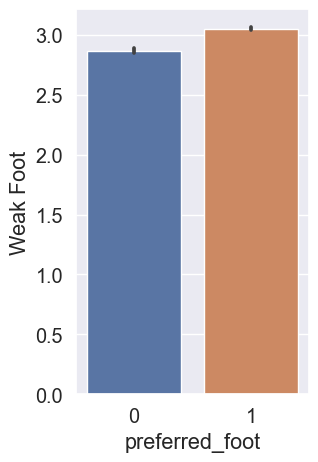

In [446]:
plt.figure(figsize=(3,5))
sns.barplot(y=dataset['Weak Foot'],x=dataset['preferred_foot'])
plt.plot()

[]

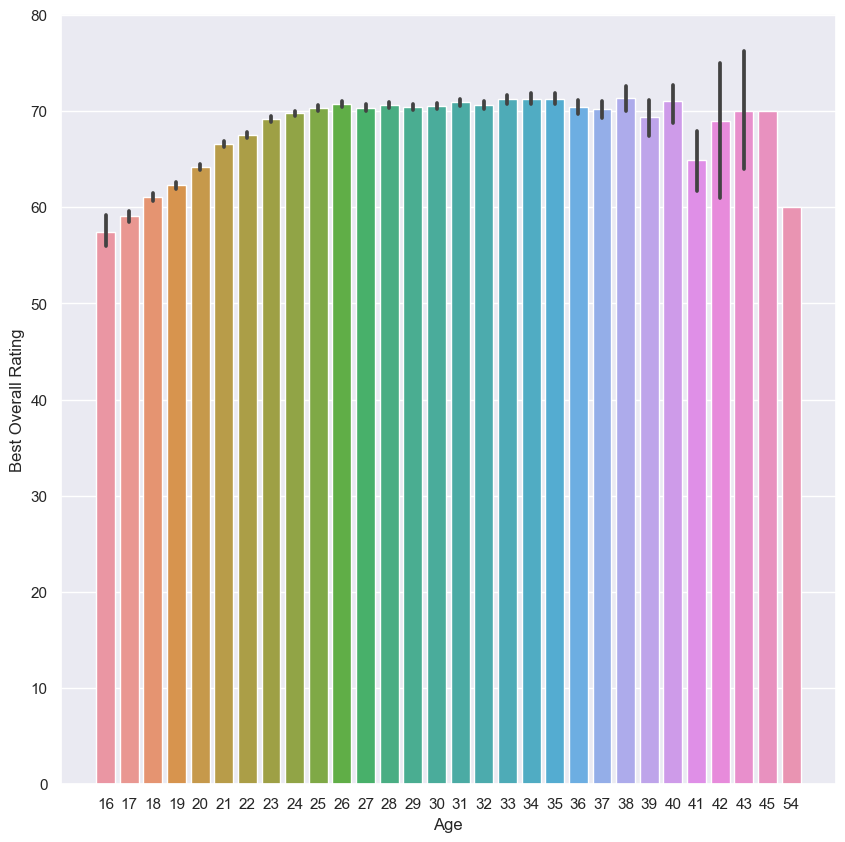

In [205]:
plt.figure(figsize=(10,10))
sns.barplot(y=dataset['Best Overall Rating'],x=dataset['Age'])
plt.plot()

In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Nationality               16710 non-null  object 
 3   Overall                   16710 non-null  int64  
 4   Potential                 16710 non-null  int64  
 5   Club                      16446 non-null  object 
 6   Value                     16710 non-null  object 
 7   Wage                      16710 non-null  object 
 8   Special                   16710 non-null  int64  
 9   Preferred Foot            16710 non-null  object 
 10  International Reputation  16710 non-null  float64
 11  Weak Foot                 16710 non-null  float64
 12  Skill Moves               16710 non-null  float64
 13  Work Rate                 16710 non-null  object 
 14  Body T

In [110]:
df = dataset.iloc[:, 22:26]

scaler = StandardScaler()

scaled_df=df.copy()

scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca_fit = pca.fit(scaled_df)

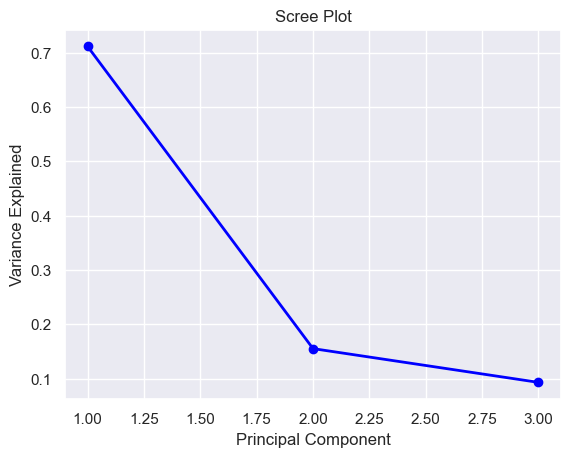

In [112]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [113]:
print(pca.explained_variance_ratio_)

[0.71131434 0.15508918 0.09293952]


In [114]:
0.71131434 + 0.15508918 + 0.09293952 

0.95934304

In [115]:
#K-NN classifier
#Naive Bayes classifier
#Random forest classifier
#GridSearchCV to set hyper parameters

In [116]:
dataset.drop(['Interceptions'],axis=1,inplace=True)
dataset.drop(['Positioning'],axis=1,inplace=True)
dataset.drop(['Vision'],axis=1,inplace=True)
dataset.drop(['Penalties'],axis=1,inplace=True)
dataset.drop(['Composure'],axis=1,inplace=True)
dataset.drop(['StandingTackle'],axis=1,inplace=True)
dataset.drop(['Marking'],axis=1,inplace=True)
dataset.drop(['SlidingTackle'],axis=1,inplace=True)
dataset.drop(['GKDiving'],axis=1,inplace=True)
dataset.drop(['GKHandling'],axis=1,inplace=True)
dataset.drop(['GKKicking'],axis=1,inplace=True)
dataset.drop(['GKPositioning'],axis=1,inplace=True)
dataset.drop(['GKReflexes'],axis=1,inplace=True)
dataset.drop(['Best Position'],axis=1,inplace=True)
dataset.drop(['Release Clause'],axis=1,inplace=True)
dataset.drop(['DefensiveAwareness'],axis=1,inplace=True)
dataset.drop(['Jersey Number'],axis=1,inplace=True)
dataset.drop(['Joined'],axis=1,inplace=True)
dataset.drop(['Loaned From'],axis=1,inplace=True)
dataset.drop(['Contract Valid Until'],axis=1,inplace=True)
dataset.drop(['Height'],axis=1,inplace=True)
dataset.drop(['Weight'],axis=1,inplace=True)
dataset.drop(['Work Rate'],axis=1,inplace=True)
dataset.drop(['Position'],axis=1,inplace=True)  
dataset.drop(['International Reputation'],axis=1,inplace=True)

In [117]:
dataset.drop(['Aggression'],axis=1,inplace=True)


In [119]:
#dropping columns that are not needed-

#dataset.drop(['Body Type'],axis=1,inplace=True)
#dataset.drop(['Dribbling'],axis=1,inplace=True)
#dataset.drop(['Curve'],axis=1,inplace=True)
#dataset.drop(['FKAccuracy'],axis=1,inplace=True)
#dataset.drop(['LongPassing'],axis=1,inplace=True)
dataset.drop(['Acceleration'],axis=1,inplace=True)
dataset.drop(['SprintSpeed'],axis=1,inplace=True)
dataset.drop(['Agility'],axis=1,inplace=True)
dataset.drop(['Balance'],axis=1,inplace=True)
dataset.drop(['Reactions'],axis=1,inplace=True)
dataset.drop(['ShotPower'],axis=1,inplace=True)
dataset.drop(['Jumping'],axis=1,inplace=True)
dataset.drop(['Stamina'],axis=1,inplace=True)
dataset.drop(['Strength'],axis=1,inplace=True)
dataset.drop(['LongShots'],axis=1,inplace=True)


In [120]:
dataset.drop(['Special'],axis=1,inplace=True)
dataset.drop(['Skill Moves'],axis=1,inplace=True)
dataset.drop(['Overall'],axis=1,inplace=True)
dataset.drop(['Potential'],axis=1,inplace=True)
dataset.drop(['Value'],axis=1,inplace=True)
dataset.drop(['Nationality'],axis=1,inplace=True)
dataset.drop(['Volleys'],axis=1,inplace=True)


In [121]:
dataset.drop(['Wage'],axis=1,inplace=True)

In [122]:
dataset.drop(['Club'],axis=1,inplace=True)

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 16710 non-null  object 
 1   Age                  16710 non-null  int64  
 2   Preferred Foot       16710 non-null  object 
 3   Weak Foot            16710 non-null  float64
 4   Crossing             16710 non-null  float64
 5   Finishing            16710 non-null  float64
 6   HeadingAccuracy      16710 non-null  float64
 7   ShortPassing         16710 non-null  float64
 8   BallControl          16710 non-null  float64
 9   Best Overall Rating  16710 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.3+ MB


In [124]:
dataset.rename(columns = {'Preferred Foot':'preferred_foot'}, inplace = True)

In [125]:
#dataset.preferred_foot.map(dict(Right=1, Left=0))

In [139]:
dataset['preferred_foot'] = dataset['preferred_foot'].map({'Right': 1, 'Left': 0})


In [140]:
dataset.head(20)

,Name,Age,preferred_foot,Weak Foot,Crossing,Finishing,HeadingAccuracy,ShortPassing,BallControl,Best Overall Rating
0,Bruno Fernandes,26,1,3.0,87.0,83.0,64.0,91.0,87.0,88.0
1,L. Goretzka,26,1,4.0,75.0,82.0,86.0,86.0,87.0,87.0
2,L. Suárez,34,1,4.0,80.0,93.0,84.0,83.0,86.0,88.0
3,K. De Bruyne,30,1,5.0,94.0,82.0,55.0,94.0,91.0,91.0
4,M. Acuña,29,0,3.0,87.0,66.0,58.0,82.0,88.0,84.0
5,J. Kimmich,26,1,4.0,91.0,68.0,72.0,87.0,85.0,89.0
6,Paulinho,32,1,4.0,67.0,83.0,85.0,82.0,83.0,83.0
7,G. Wijnaldum,30,1,4.0,72.0,75.0,78.0,87.0,88.0,84.0
8,E. Can,27,1,4.0,69.0,76.0,82.0,83.0,79.0,85.0
9,A. Griezmann,30,0,3.0,83.0,84.0,83.0,84.0,89.0,86.0


In [350]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 16710 non-null  object 
 1   Age                  16710 non-null  int64  
 2   preferred_foot       16710 non-null  int64  
 3   Weak Foot            16710 non-null  float64
 4   Crossing             16710 non-null  float64
 5   Finishing            16710 non-null  float64
 6   HeadingAccuracy      16710 non-null  float64
 7   ShortPassing         16710 non-null  float64
 8   Best Overall Rating  16710 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


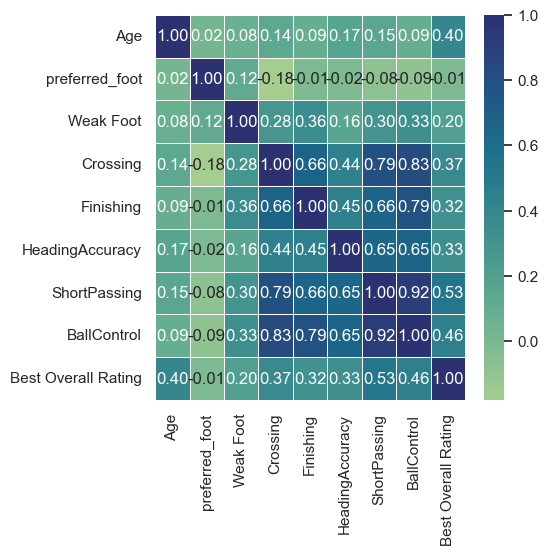

In [142]:
plt.figure(figsize=(5,5))
sns.heatmap(dataset.corr(),annot=True, cmap='crest',linewidth=0.5, fmt='.2f');

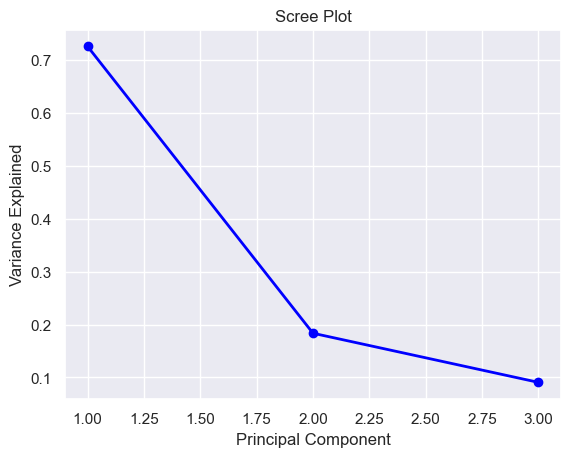

In [143]:
df = dataset.iloc[:, 5:8]

scaler = StandardScaler()

scaled_df=df.copy()

scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)


pca = PCA(n_components=3)

pca_fit = pca.fit(scaled_df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [131]:
print(pca.explained_variance_ratio_)

[0.72567068 0.18358438 0.09074494]


In [144]:
0.72567068 + 0.18358438 + 0.09074494

1.0

In [348]:
dataset.drop(['BallControl'],axis=1,inplace=True)

In [349]:
dataset.tail()

,Name,Age,preferred_foot,Weak Foot,Crossing,Finishing,HeadingAccuracy,ShortPassing,Best Overall Rating
16705,18 L. Clayton,17,1,2.0,12.0,5.0,13.0,18.0,52.0
16706,�. Dobre,20,1,2.0,13.0,7.0,10.0,17.0,53.0
16707,21 Xue Qinghao,19,1,2.0,12.0,9.0,14.0,15.0,47.0
16708,A. Shaikh,18,1,3.0,13.0,8.0,10.0,22.0,47.0
16709,07 A. Censori,17,1,2.0,34.0,39.0,29.0,32.0,36.0


In [380]:
#classify them based on their best overall rating
X = dataset[dataset.columns[1:3]]
y = dataset[dataset.columns[8]]

In [381]:
X

,Age,preferred_foot
0,26,1
1,26,1
2,34,1
3,30,1
4,29,0
...,...,...
16705,17,1
16706,20,1
16707,19,1
16708,18,1


In [382]:
y

0        88.0
1        87.0
2        88.0
3        91.0
4        84.0
         ... 
16705    52.0
16706    53.0
16707    47.0
16708    47.0
16709    36.0
Name: Best Overall Rating, Length: 16710, dtype: float64

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [384]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [443]:
print('Training data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)

Training data shape: (11697, 2)
Testing data shape: (5013, 2)


In [442]:
print('Training data shape:', y_train.shape)
print('Testing data shape:', y_test.shape)

Training data shape: (11697,)
Testing data shape: (5013,)


In [387]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  49
Output classes :  [36. 44. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61.
 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79.
 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90. 91. 92.]


In [388]:
features = dataset.columns[1:9]
x = dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) 

In [389]:
features

Index(['Age', 'preferred_foot', 'Weak Foot', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Best Overall Rating'],
      dtype='object')

In [390]:
x.shape

(16710, 8)

In [391]:
np.mean(x),np.std(x)

(-2.381232387945279e-17, 1.0)

In [242]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [243]:
normalised_data = pd.DataFrame(x,columns=feat_cols)

In [244]:
normalised_data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
0,0.053992,0.569933,-0.012026,1.957456,1.766645,0.580730,2.172389,1.634197
1,0.053992,0.569933,1.454848,1.282230,1.715102,1.874290,1.806489,1.634197
2,1.638540,0.569933,1.454848,1.563574,2.282079,1.756694,1.586950,1.570392
3,0.846266,0.569933,2.921723,2.351338,1.715102,0.051546,2.391929,1.889415
4,0.648197,-1.754592,-0.012026,1.957456,0.890408,0.227941,1.513770,1.698001
...,...,...,...,...,...,...,...,...
16705,-1.728625,0.569933,-1.478901,-2.262709,-2.253738,-2.417979,-3.169747,-3.278749
16706,-1.134419,0.569933,-1.478901,-2.206440,-2.150651,-2.594373,-3.242927,-2.832117
16707,-1.332488,0.569933,-1.478901,-2.262709,-2.047565,-2.359180,-3.389287,-3.151140
16708,-1.530556,0.569933,-0.012026,-2.206440,-2.099108,-2.594373,-2.877028,-3.087335


In [245]:
pca_data = PCA(n_components=2)
principalComponents_data = pca_data.fit_transform(x)

principal_Df = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2'])


In [246]:
principal_Df

finaldf= pd.concat([principal_Df,dataset[['preferred_foot']]],axis=1)

In [247]:
finaldf

,principal component 1,principal component 2,preferred_foot
0,-3.577264,-0.098198,1
1,-3.861737,-0.947023,1
2,-4.197209,-1.312315,1
3,-4.466123,-1.659037,1
4,-2.982282,1.697787,0
...,...,...,...
16705,6.364109,0.129571,1
16706,6.119408,0.019716,1
16707,6.260012,0.023241,1
16708,5.777481,-0.628012,1


In [444]:
print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))
print('')
print('From the above output, you can observe that the principal component 1 holds 49.40% of the information while the principal component 2 holds only 13.99% of the information. This shows that 36.60% information was lost.')

Explained variation per principal component: [0.49403905 0.13995155]

From the above output, you can observe that the principal component 1 holds 49.40% of the information while the principal component 2 holds only 13.99% of the information. This shows that 36.60% information was lost.


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

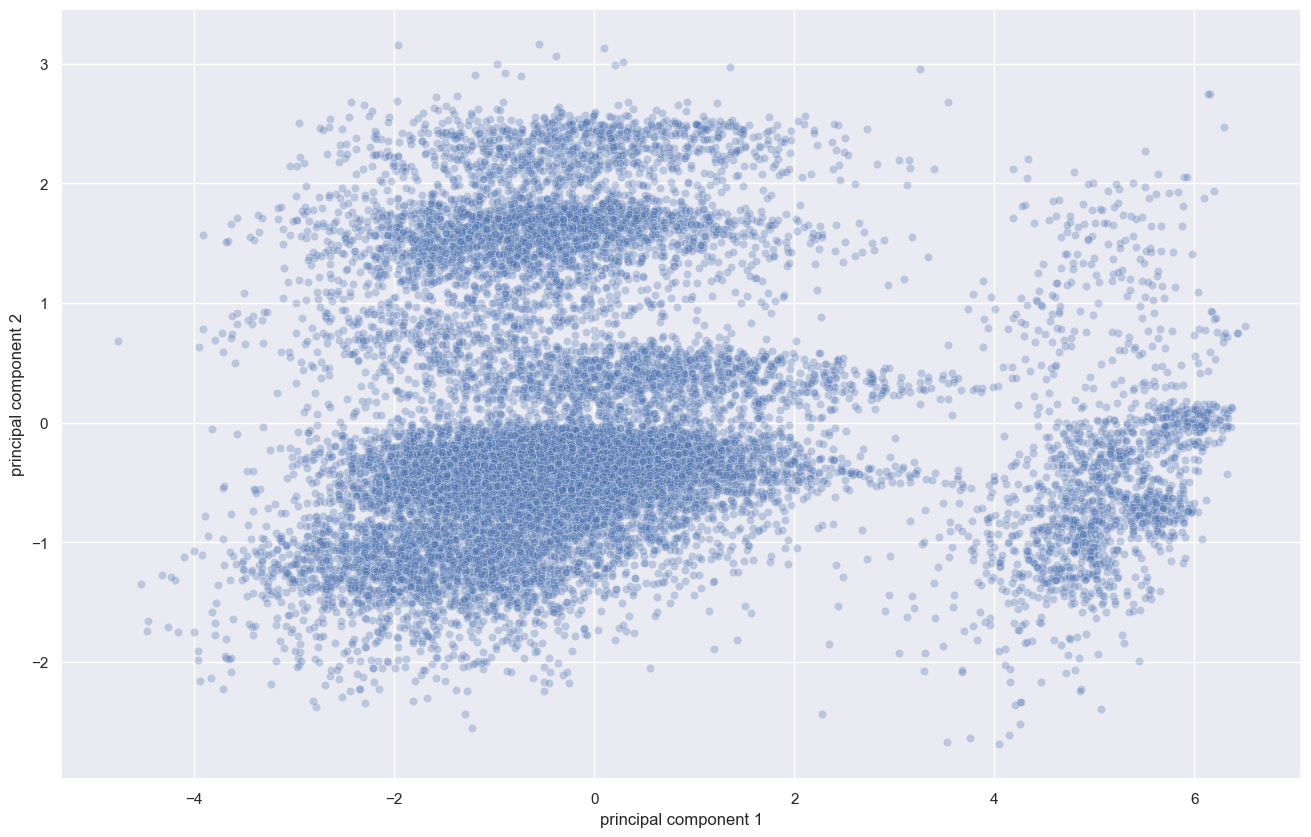

In [249]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_Df,
    legend="full",
    alpha=0.3
)

In [250]:
#dataset.sort_values(['Best Overall Rating'],ascending=False)[:10]

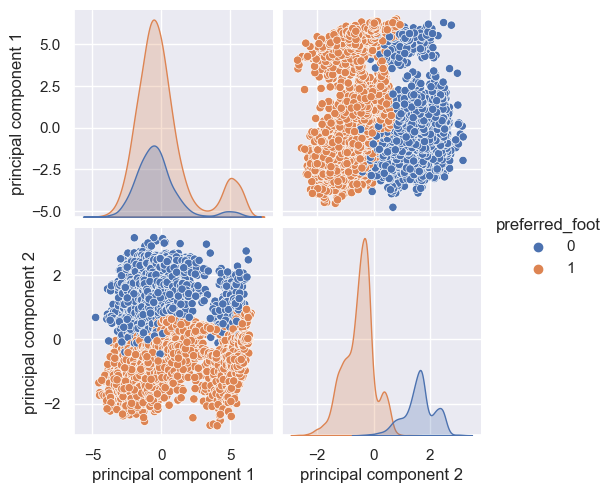

In [251]:
sns.pairplot(data=finaldf, hue = "preferred_foot")

In [410]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
#accuracy
print(knn.score(X_test, y_test))


[71. 69. 67. ... 66. 65. 62.]
0.5585477757829642


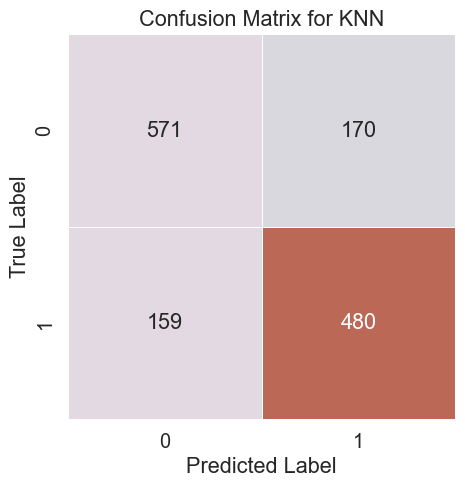

In [420]:
cmatrix = confusion_matrix(y_test, y_pred_5)
sns.set(font_scale=1.3)
plt.subplots(figsize=(5, 5))
sns.heatmap(cmatrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN');

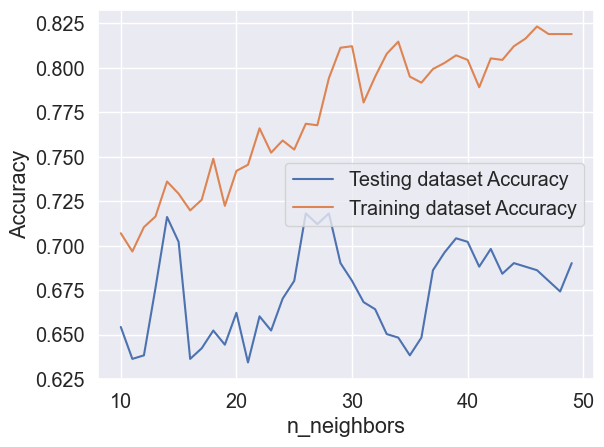

In [433]:
neighbors = np.arange(10, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [436]:
knn5 = KNeighborsClassifier(n_neighbors = 50)
knn1 = KNeighborsClassifier(n_neighbors= 10)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [441]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=50", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=10", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=50 79.79253939756633
Accuracy with k=10 76.20187512467584
